# Predicting Factors Influencing Student Academic Performance


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split ,cross_val_score , StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report ,accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
df=pd.read_csv('24251325_Joyston.csv')
df.head()

,Gender,School Type,Studies Daily,Attends Extra Classes,Uses Online Learning Platforms,Has a Fixed Study Schedule,Participates in Group Study,Sleeps at Least 7 Hours,Uses Social Media During Study Hours,Submits Assignments on Time,...,Uses a Tutor,Prefers Studying Alone,Attends School Regularly,Has a Part-time Job,Uses a Planner for Schoolwork,Gets Nervous Before Exams,Prefers Online Classes Over In-person,Takes Notes in Class,Has a Quiet Study Environment at Home,High Performer
0,Female,Private,Yes,No,Yes,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
1,Male,Public,Yes,No,Yes,Yes,Yes,Yes,No,Yes,...,No,No,No,Yes,Yes,No,No,No,No,Yes
2,Female,Private,Yes,No,Yes,No,No,Yes,Yes,No,...,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No
3,Male,Public,No,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,No,No,Yes,Yes,No,Yes,Yes,Yes,No
4,Female,Public,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,No,Yes,No,Yes,Yes,No,No,Yes,No,Yes


In [3]:
df.isnull().sum()

Gender                                   0
School Type                              0
Studies Daily                            0
Attends Extra Classes                    0
Uses Online Learning Platforms           0
Has a Fixed Study Schedule               0
Participates in Group Study              0
Sleeps at Least 7 Hours                  0
Uses Social Media During Study Hours     0
Submits Assignments on Time              0
Enjoys Reading                           0
Participates in School Activities        0
Uses a Tutor                             0
Prefers Studying Alone                   0
Attends School Regularly                 0
Has a Part-time Job                      0
Uses a Planner for Schoolwork            0
Gets Nervous Before Exams                0
Prefers Online Classes Over In-person    0
Takes Notes in Class                     0
Has a Quiet Study Environment at Home    0
High Performer                           0
dtype: int64

In [4]:
# Check skewness
skewed_columns = df.skew(numeric_only=True)
print("Skewness:\n", skewed_columns)

Skewness:
 Series([], dtype: float64)


In [5]:
# Step 2: Encode categorical variables to numeric using Label Encoding

df_encoded = df.copy()
label_encoders = {}
for column in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le
df_encoded

,Gender,School Type,Studies Daily,Attends Extra Classes,Uses Online Learning Platforms,Has a Fixed Study Schedule,Participates in Group Study,Sleeps at Least 7 Hours,Uses Social Media During Study Hours,Submits Assignments on Time,...,Uses a Tutor,Prefers Studying Alone,Attends School Regularly,Has a Part-time Job,Uses a Planner for Schoolwork,Gets Nervous Before Exams,Prefers Online Classes Over In-person,Takes Notes in Class,Has a Quiet Study Environment at Home,High Performer
0,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,1,1,1,0,0
1,1,1,1,0,1,1,1,1,0,1,...,0,0,0,1,1,0,0,0,0,1
2,0,0,1,0,1,0,0,1,1,0,...,0,1,1,0,1,1,0,1,1,0
3,1,1,0,1,1,0,1,1,1,1,...,0,0,0,1,1,0,1,1,1,0
4,0,1,1,0,1,1,1,0,1,1,...,0,1,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0,1,0,1,0,0,0,0,1,1,...,0,0,0,0,1,1,0,0,1,1
306,1,1,0,1,0,1,1,1,1,1,...,1,1,1,0,1,0,1,0,0,1
307,0,1,0,0,1,0,1,1,0,1,...,0,0,0,1,0,0,1,1,1,1
308,0,0,0,1,0,1,0,1,1,1,...,0,1,0,0,0,0,0,1,0,1


In [6]:
# Step 3: Check skewness for each encoded feature
skewness = df_encoded.drop(columns=['High Performer']).skew()

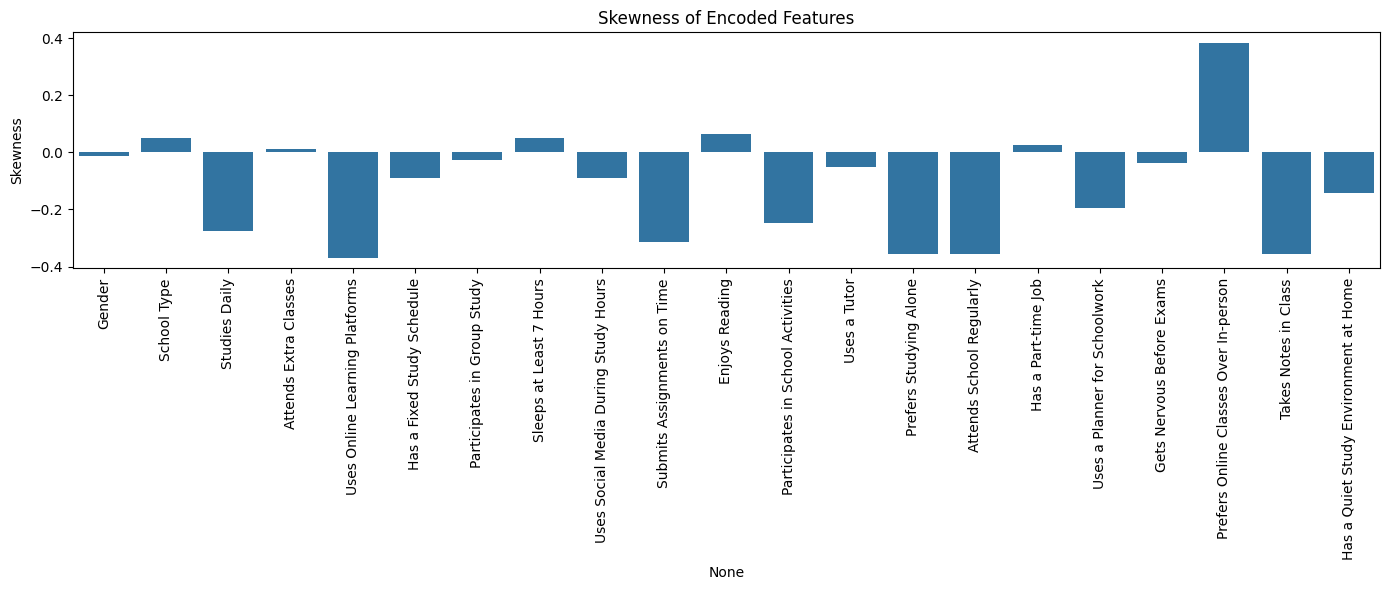

In [7]:
# Step 4: Visualize skewness
plt.figure(figsize=(14, 6))
sns.barplot(x=skewness.index, y=skewness.values)
plt.title("Skewness of Encoded Features")
plt.xticks(rotation=90)
plt.ylabel("Skewness")
plt.tight_layout()
plt.show()

In [8]:
x=df_encoded.drop(columns=['High Performer'])
y=df_encoded['High Performer']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y,train_size=0.8, test_size=0.2, random_state=42)

In [10]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled

,Gender,School Type,Studies Daily,Attends Extra Classes,Uses Online Learning Platforms,Has a Fixed Study Schedule,Participates in Group Study,Sleeps at Least 7 Hours,Uses Social Media During Study Hours,Submits Assignments on Time,...,Participates in School Activities,Uses a Tutor,Prefers Studying Alone,Attends School Regularly,Has a Part-time Job,Uses a Planner for Schoolwork,Gets Nervous Before Exams,Prefers Online Classes Over In-person,Takes Notes in Class,Has a Quiet Study Environment at Home
0,0,1,1,0,0,0,0,1,1,1,...,1,0,1,1,0,0,1,0,1,0
1,1,1,1,0,0,1,1,1,0,0,...,1,1,0,1,0,1,0,1,1,1
2,1,1,1,1,0,1,0,0,1,0,...,1,1,0,1,0,0,0,0,1,1
3,0,0,1,0,0,1,0,0,0,1,...,0,1,0,1,0,0,1,1,1,0
4,0,0,1,0,0,1,0,0,1,0,...,1,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,1,0,1,1,1,1,1,0,1,1,...,0,0,1,1,1,0,1,1,0,0
286,0,1,1,0,1,0,1,1,1,0,...,1,0,1,0,1,0,0,0,0,0
287,0,1,1,0,0,1,0,1,0,1,...,1,1,0,1,0,0,1,0,0,1
288,0,0,0,0,1,1,0,0,0,1,...,0,0,0,1,0,1,1,0,1,1


In [11]:
y_train_resampled

0      0
1      1
2      1
3      1
4      0
      ..
285    0
286    0
287    0
288    0
289    0
Name: High Performer, Length: 290, dtype: int64

In [12]:
smote

SMOTE(random_state=42)

In [13]:
print("Before resampling:")
print(pd.Series(y_train).value_counts())

# Check class distribution after resampling
print("\nAfter resampling:")
print(pd.Series(y_train_resampled).value_counts())


Before resampling:
High Performer
1    145
0    103
Name: count, dtype: int64

After resampling:
High Performer
0    145
1    145
Name: count, dtype: int64


In [14]:
scaler = StandardScaler()
#scaler.fit(X_train_resampled)
x_train_scale=scaler.fit_transform(X_train_resampled)
#x_train_scale=scaler.transform(X_train_resampled)
X_test_scale=scaler.transform(X_test)

# LogisticRegression

In [15]:
# Step 7: Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train_scale, y_train_resampled)

LogisticRegression(max_iter=1000)

In [16]:
#logistic
pred=log_model.predict(X_test_scale)

In [17]:
#logistic
print("Confusion Matrix: \n",confusion_matrix(y_test,pred))

Confusion Matrix: 
 [[17 10]
 [14 21]]


In [18]:
report = classification_report(y_test, pred, output_dict=True)
accuracy = report['accuracy']  # Accuracy is directly available in the dictionary
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.61


In [19]:
#logistic
print("=== LogisticRegression Results ===")
print(classification_report(y_test,pred))

=== LogisticRegression Results ===
              precision    recall  f1-score   support

           0       0.55      0.63      0.59        27
           1       0.68      0.60      0.64        35

    accuracy                           0.61        62
   macro avg       0.61      0.61      0.61        62
weighted avg       0.62      0.61      0.61        62



In [20]:
cv_scores = cross_val_score(log_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores*100)
print("Mean CV Score:", np.mean(cv_scores*100))


Cross-Validation Scores: [58.62068966 50.         63.79310345 70.68965517 67.24137931]
Mean CV Score: 62.06896551724138


# RandomForestClassifier

In [21]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42) 
model.fit(x_train_scale, y_train_resampled)
model

RandomForestClassifier(random_state=42)

In [22]:
#randomforestclassifier
pred1=model.predict(X_test_scale)

In [23]:
#randomforestclassifier
print(confusion_matrix(y_test,pred1))

[[20  7]
 [ 9 26]]


In [24]:
report = classification_report(y_test, pred1, output_dict=True)
accuracy = report['accuracy']  # Accuracy is directly available in the dictionary
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


In [25]:
#randomforestclassifier
print("=== RandomForestClassifier Results ===")
print(classification_report(y_test,pred1))

=== RandomForestClassifier Results ===
              precision    recall  f1-score   support

           0       0.69      0.74      0.71        27
           1       0.79      0.74      0.76        35

    accuracy                           0.74        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.75      0.74      0.74        62



In [26]:
cv_scores = cross_val_score(model, x_train_scale, y_train_resampled, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores*100)
print("Mean CV Accuracy:", np.mean(cv_scores*100))

Cross-Validation Scores: [79.31034483 74.13793103 82.75862069 87.93103448 96.55172414]
Mean CV Accuracy: 84.13793103448276


# SVM

In [27]:
svm_model = SVC(kernel='rbf')
svm_model.fit(x_train_scale, y_train_resampled)
svm_model

SVC()

In [28]:
#svm
svm_pred = svm_model.predict(X_test_scale)

In [29]:
#svm
print(confusion_matrix(y_test,svm_pred))

[[19  8]
 [ 7 28]]


In [30]:
report = classification_report(y_test, svm_pred, output_dict=True)
accuracy = report['accuracy']  # Accuracy is directly available in the dictionary
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


In [31]:
#svm
print("=== SVM Results ===")
print(classification_report(y_test,svm_pred))

=== SVM Results ===
              precision    recall  f1-score   support

           0       0.73      0.70      0.72        27
           1       0.78      0.80      0.79        35

    accuracy                           0.76        62
   macro avg       0.75      0.75      0.75        62
weighted avg       0.76      0.76      0.76        62



In [32]:
cv_scores = cross_val_score(svm_model, x_train_scale, y_train_resampled, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores*100)
print("Mean CV Accuracy:", np.mean(cv_scores*100))

Cross-Validation Scores: [81.03448276 70.68965517 82.75862069 91.37931034 93.10344828]
Mean CV Accuracy: 83.79310344827586


# MLPClassifier

In [33]:
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp_model.fit(x_train_scale, y_train_resampled)
mlp_model



MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

In [34]:
mlp_pred = mlp_model.predict(X_test_scale)

In [35]:
print(confusion_matrix(y_test,mlp_pred))

[[19  8]
 [ 8 27]]


In [36]:
report = classification_report(y_test, mlp_pred, output_dict=True)
accuracy = report['accuracy']  # Accuracy is directly available in the dictionary
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


In [37]:
print("=== MLPClassifier Results ===")
print("Classification Report:\n", classification_report(y_test, mlp_pred))

=== MLPClassifier Results ===
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70        27
           1       0.77      0.77      0.77        35

    accuracy                           0.74        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.74      0.74      0.74        62



In [38]:
cv_scores = cross_val_score(mlp_model, x_train_scale, y_train_resampled, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores*100)
print("Mean CV Accuracy:", np.mean(cv_scores*100))

Cross-Validation Scores: [82.75862069 77.5862069  87.93103448 91.37931034 96.55172414]
Mean CV Accuracy: 87.24137931034484


C:\Users\joyst\AppData\Local\Temp\ipykernel_2388\2432261073.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel")


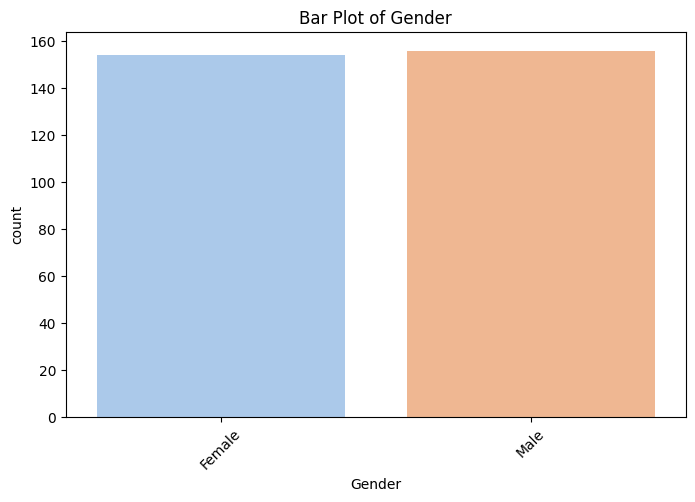

C:\Users\joyst\AppData\Local\Temp\ipykernel_2388\2432261073.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel")


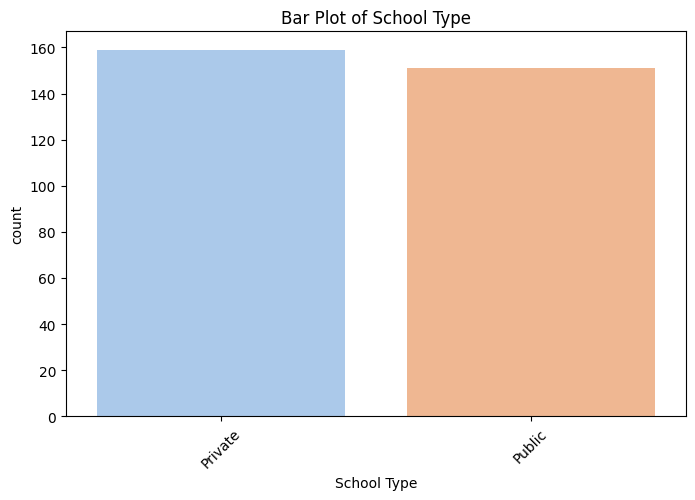

C:\Users\joyst\AppData\Local\Temp\ipykernel_2388\2432261073.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel")


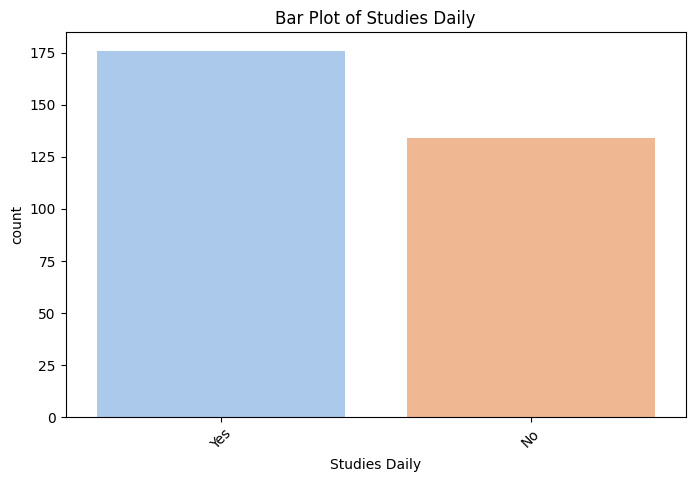

C:\Users\joyst\AppData\Local\Temp\ipykernel_2388\2432261073.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel")


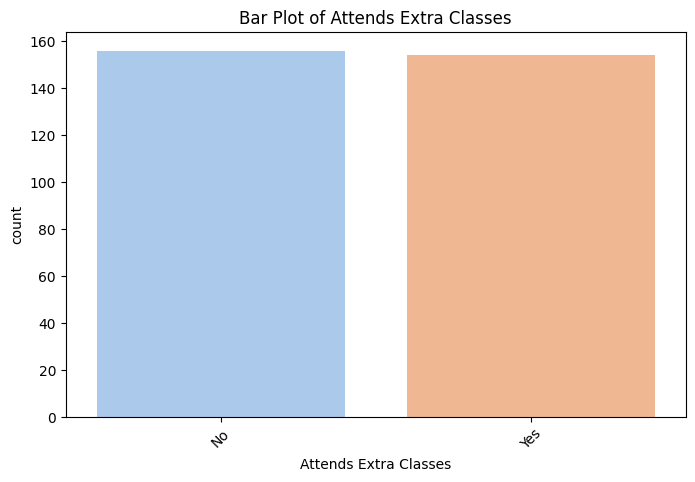

C:\Users\joyst\AppData\Local\Temp\ipykernel_2388\2432261073.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel")


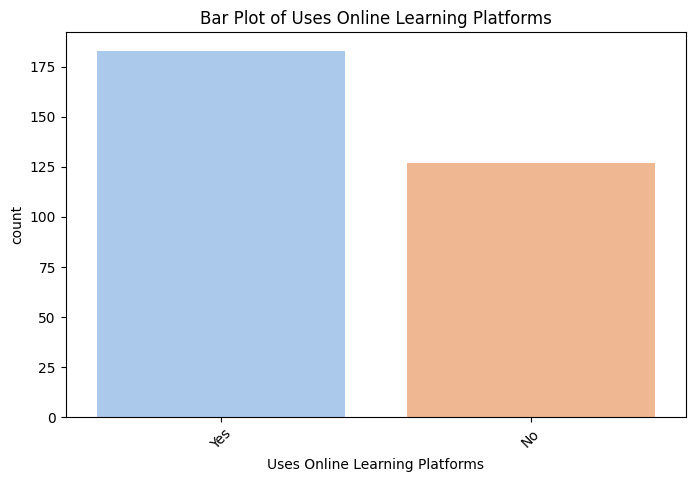

C:\Users\joyst\AppData\Local\Temp\ipykernel_2388\2432261073.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel")


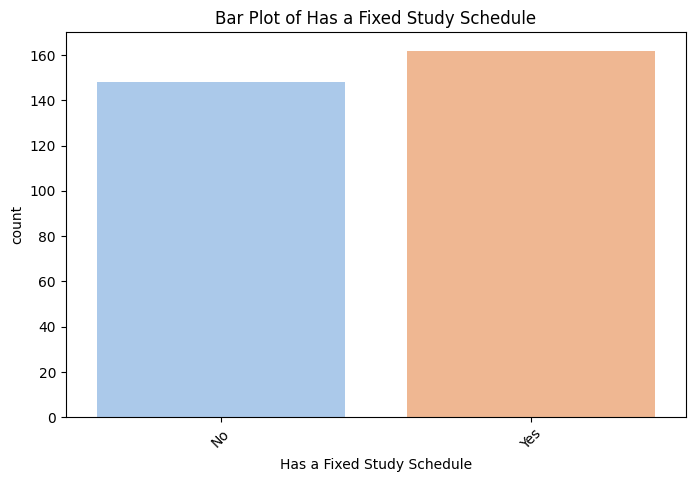

C:\Users\joyst\AppData\Local\Temp\ipykernel_2388\2432261073.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel")


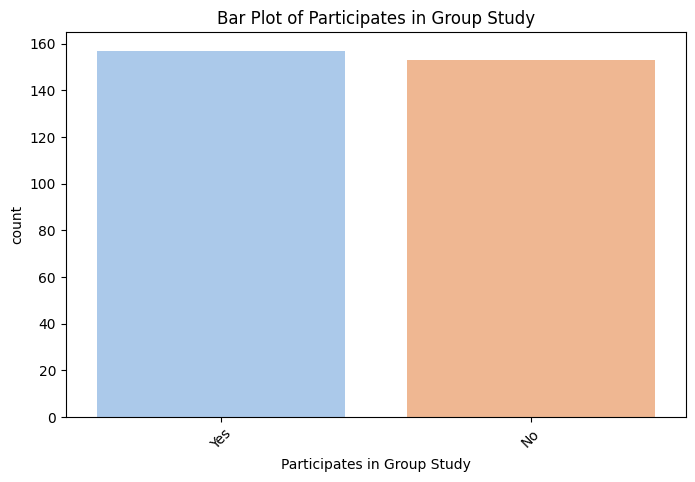

C:\Users\joyst\AppData\Local\Temp\ipykernel_2388\2432261073.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel")


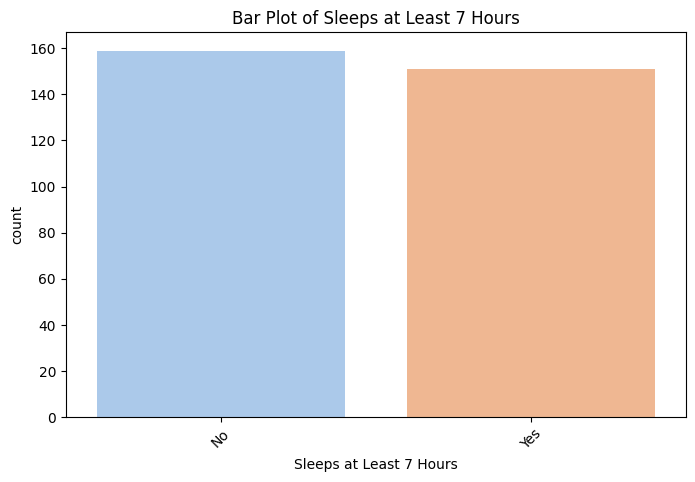

C:\Users\joyst\AppData\Local\Temp\ipykernel_2388\2432261073.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel")


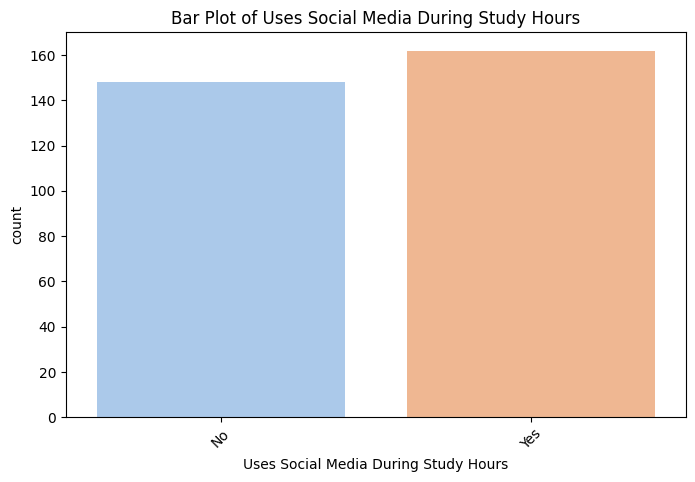

C:\Users\joyst\AppData\Local\Temp\ipykernel_2388\2432261073.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel")


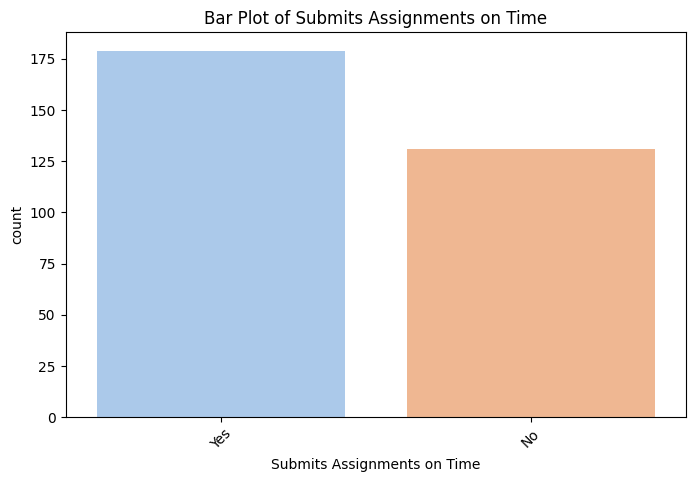

C:\Users\joyst\AppData\Local\Temp\ipykernel_2388\2432261073.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel")


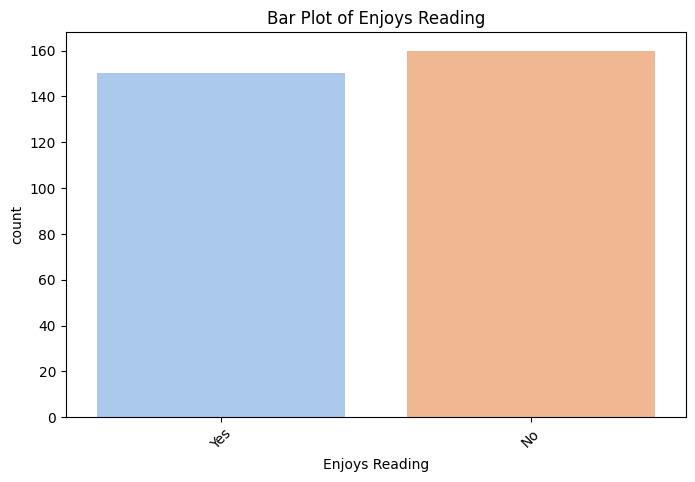

C:\Users\joyst\AppData\Local\Temp\ipykernel_2388\2432261073.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel")


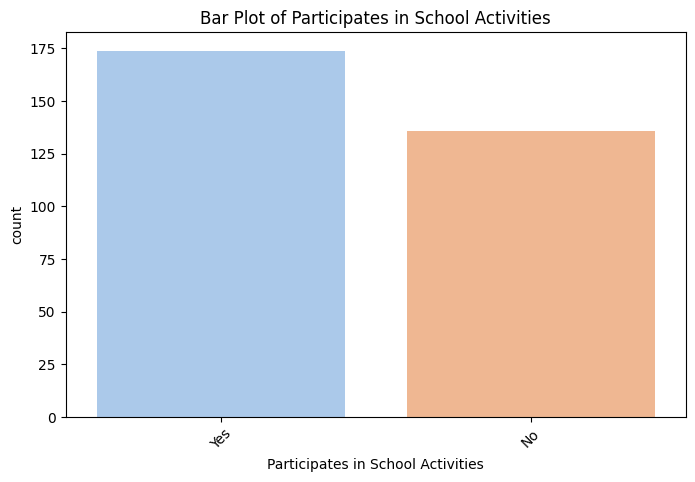

C:\Users\joyst\AppData\Local\Temp\ipykernel_2388\2432261073.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel")


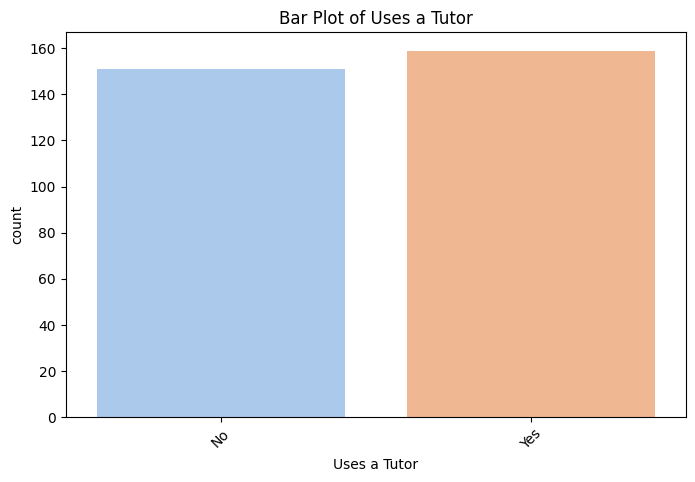

C:\Users\joyst\AppData\Local\Temp\ipykernel_2388\2432261073.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel")


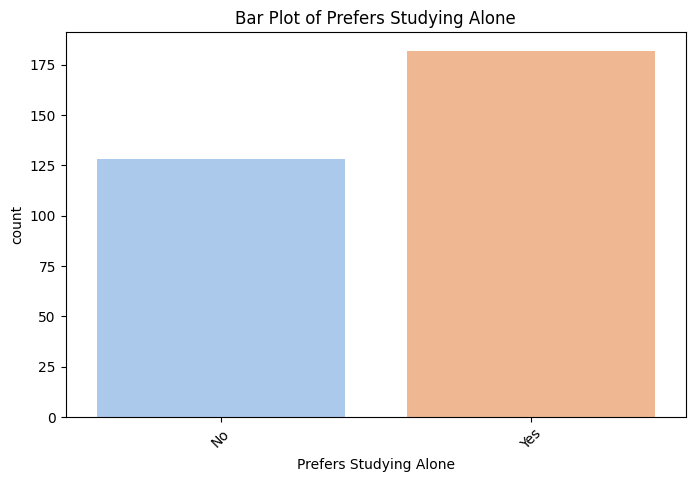

C:\Users\joyst\AppData\Local\Temp\ipykernel_2388\2432261073.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel")


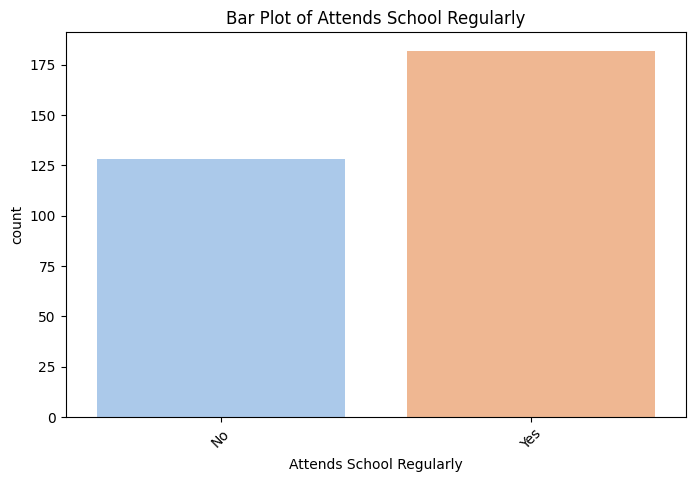

C:\Users\joyst\AppData\Local\Temp\ipykernel_2388\2432261073.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel")


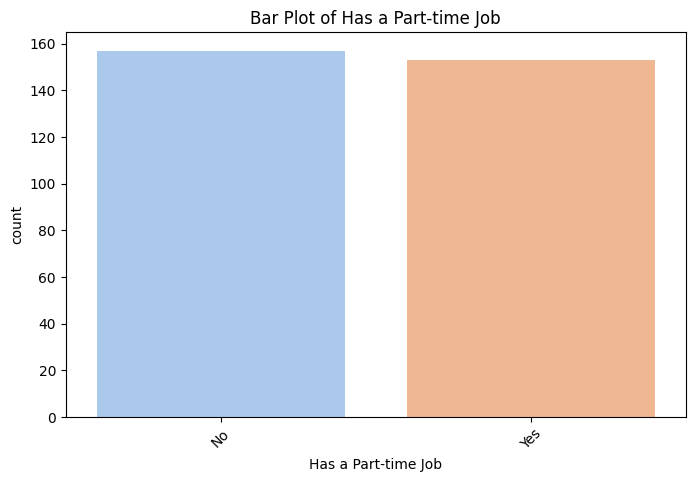

C:\Users\joyst\AppData\Local\Temp\ipykernel_2388\2432261073.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel")


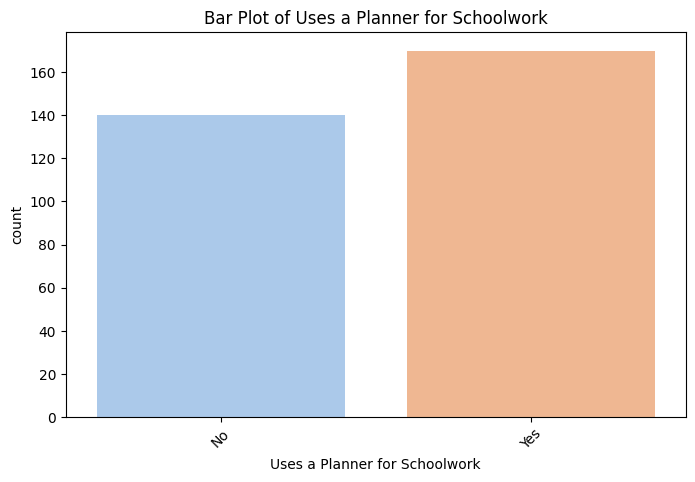

C:\Users\joyst\AppData\Local\Temp\ipykernel_2388\2432261073.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel")


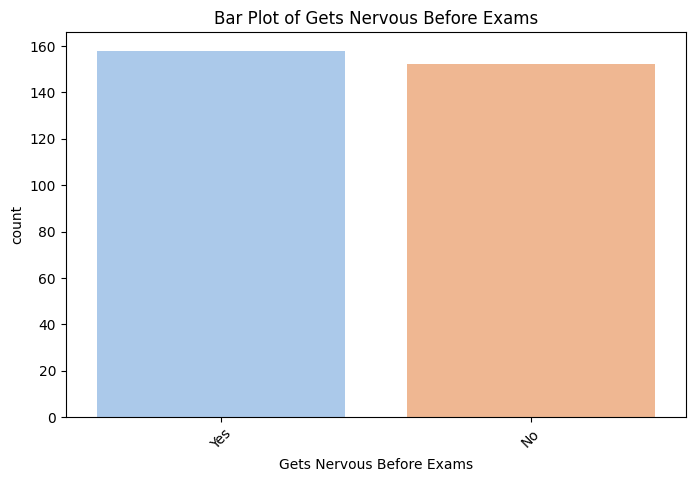

C:\Users\joyst\AppData\Local\Temp\ipykernel_2388\2432261073.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel")


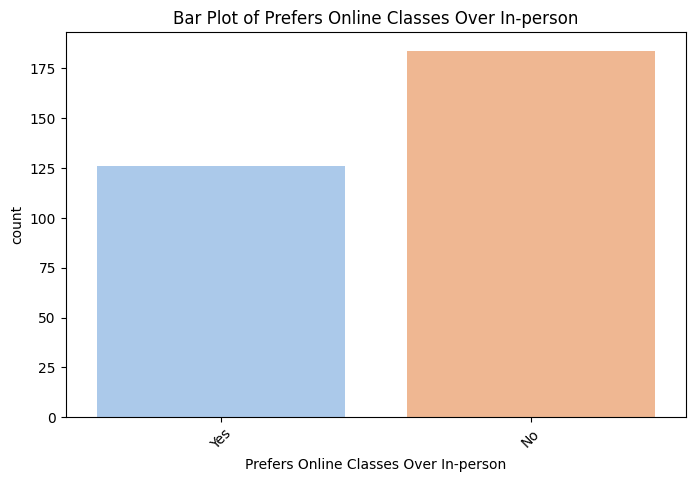

C:\Users\joyst\AppData\Local\Temp\ipykernel_2388\2432261073.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel")


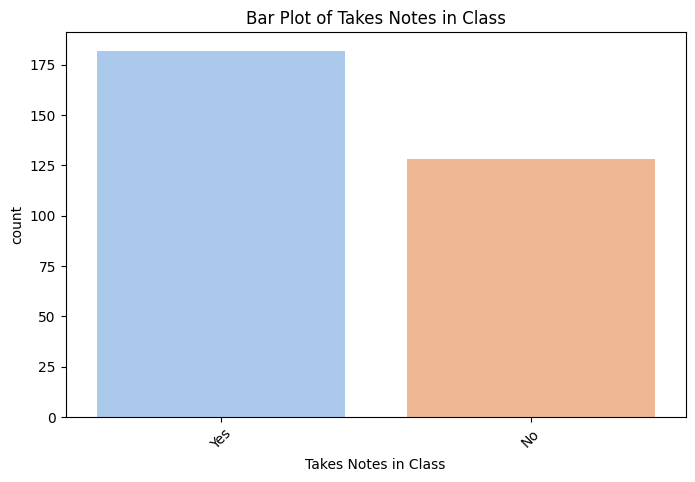

C:\Users\joyst\AppData\Local\Temp\ipykernel_2388\2432261073.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel")


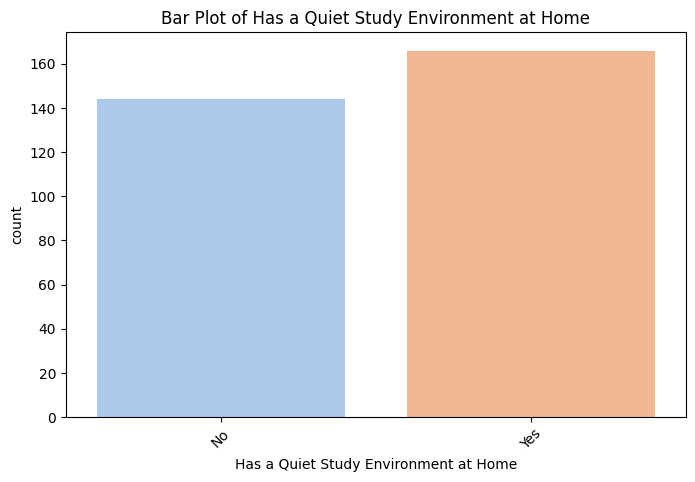

C:\Users\joyst\AppData\Local\Temp\ipykernel_2388\2432261073.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="pastel")


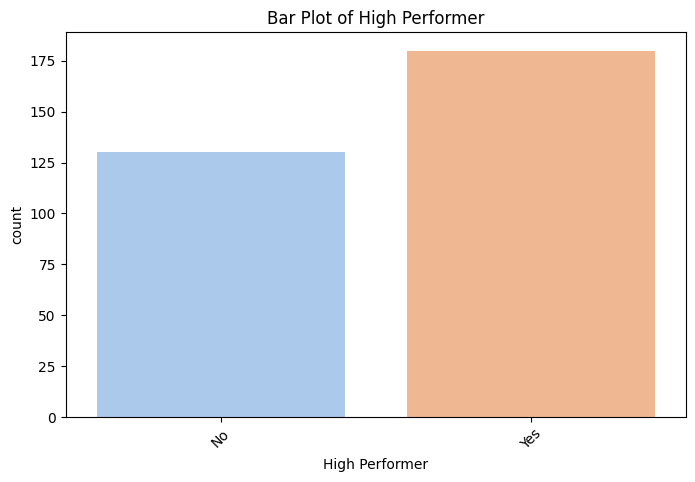

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV (Replace with actual filename)
df = pd.read_csv("24251325_Joyston.csv")

# Identify categorical columns (non-numeric ones)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Create bar plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[column], palette="pastel")
    plt.title(f"Bar Plot of {column}")
    plt.xticks(rotation=45)  # Rotate labels if needed
    plt.show()